In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Cross Entropy Loss
def fCE(yhat, y):
    return -np.mean(np.log(yhat[y==1]))
# Percent Correct
def fPC(yhat, y):
    return np.mean(y.argmax(axis=1) == yhat.argmax(axis=1))

def predictor(w, X):
    z = np.exp(X.dot(w))
    z_sum = np.sum(z, axis=1).reshape(-1, 1)
    yhat = z/z_sum
    return yhat

def SGD(w, X, y):
    yhat = predictor(w, X)
    n = y.shape[0]
    w = X.T.dot(yhat-y)/n
    return w

# Given training and testing data, learning rate epsilon, and a specified batch size,
# conduct stochastic gradient descent (SGD) to optimize the weight matrix W (785x10).
# Then return W.
def softmaxRegression (trainingImages, trainingLabels, testingImages, testingLabels, epsilon = None, batchSize = None):
    n = trainingLabels.shape[0]
    W = 0.01 * np.random.randn(785,10)
    for n_tilde in range(n // batchSize):
        mini_x = trainingImages[n_tilde*batchSize: (n_tilde+1)*batchSize]
        mini_y = trainingLabels[n_tilde*batchSize: (n_tilde+1)*batchSize] 
        W = W - epsilon*SGD(W, mini_x, mini_y)
    return W



In [70]:

# Load data
trainingImages = np.load("small_mnist_train_images.npy")
trainingLabels = np.load("small_mnist_train_labels.npy")
testingImages = np.load("small_mnist_test_images.npy")
testingLabels = np.load("small_mnist_test_labels.npy")


# Append a constant 1 term to each example to correspond to the bias terms
# ...
trainingImages = np.insert(trainingImages, 784, 1, axis=1)
testingImages = np.insert(testingImages, 784, 1, axis=1)
print(trainingImages[100: 200].shape)
print(testingLabels[0])




(100, 785)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [64]:
W = softmaxRegression(trainingImages, trainingLabels, testingImages, testingLabels, epsilon=0.1, batchSize=100)

# Visualize the vectors
# ...


0.8847467799645882


In [88]:
i=1
for w in W[:784].T:
    print(i)
    i = i+1

690984e-04 -9.42632147e-03  9.06438094e-03
 -1.47202370e-02 -4.33634456e-03 -1.12127644e-03 -6.19570131e-03
 -3.93294153e-03 -5.78680589e-03  3.82880854e-02  5.14412443e-02
  7.13378552e-02  4.86286661e-02  2.80644108e-02 -7.01102341e-03
  1.71677321e-02  1.03448816e-02  9.40231795e-03  3.07738990e-02
  6.51053978e-03 -9.77126244e-03  8.35115570e-03  8.41203626e-03
 -9.18237723e-03  1.09713795e-02  2.36712669e-02  7.10263541e-03
 -1.93349346e-03  1.46855411e-02 -1.27835372e-02 -7.42076020e-03
 -1.51866931e-02 -8.61982737e-03 -1.05384440e-02 -2.93533536e-02
 -2.04711746e-02 -2.76309805e-02  1.16860299e-02  3.87652918e-02
  8.00966828e-02  6.77086147e-02  3.69727616e-02  2.82894501e-02
  3.93059572e-02  1.09826277e-02 -1.64758621e-02 -2.89623774e-02
 -1.35439280e-02 -1.79798849e-02 -2.09980517e-02  6.64161990e-04
 -1.24331303e-03  1.30189092e-02  4.12087504e-03  4.25757102e-03
  1.59154163e-02 -4.98354239e-03  3.11279109e-04 -2.90483842e-03
 -4.08728469e-04 -5.31192144e-03 -1.29837570e-0

In [71]:
print(predictor(W, testingImages)[0])

[0.01301762 0.00313434 0.01189602 0.01920782 0.01778909 0.01164014
 0.00385844 0.85111309 0.01336918 0.05497425]


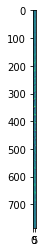

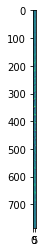

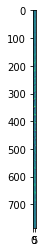

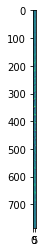

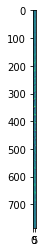

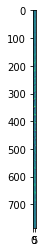

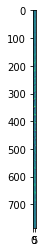

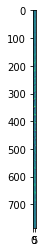

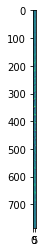

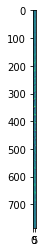

In [81]:
for w in W[:784].T:
    weight_image = w.reshape((28, 28))
    plt.imshow(W)
    plt.show()